In [ ]:
## add a contour line at 0.3
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
m3.get_var('eco2D_Uptake_Fluxes_C').array.isel(time=0).plot(ax=ax)
## add a contour line at 0.3
m3.get_var('eco2D_Uptake_Fluxes_C').array.isel(time=0).plot.contour(ax=ax, levels=[0.1], colors='k')

In [1]:
from cgeniepy.model import GenieModel

m1 = GenieModel("../model/muffin.u067bc.PO4.8P8Z.EXP1")
sst= m1.get_var('ocn_sur_temp',mutable=False)

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/Users/yingrui/cgeniepy/src/cgeniepy/model.py:48: UserWarning: No gemflag is provided, use default gemflags: [biogem]
  warnings.warn("No gemflag is provided, use default gemflags: [biogem]")


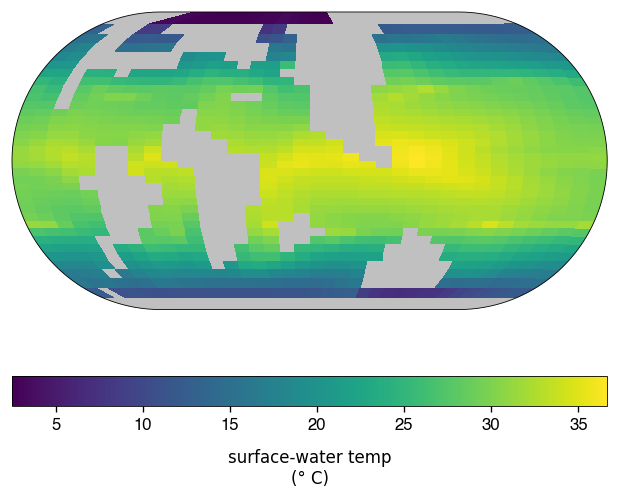

In [2]:
sst.isel(time=0).plot(colorbar=True)

In [ ]:
sst.units

In [ ]:
m1.get_var("ocn_sur_temp").data

In [ ]:
gyre_mask = m3.get_var('eco2D_Uptake_Fluxes_C').array.isel(time=0) < 0.1
other_mask = m3.get_var('eco2D_Uptake_Fluxes_C').array.isel(time=0) >= 0.1

In [ ]:
ocean_mask = m3.grid_category()==2

In [ ]:
m3.get_var('bio_fexport_POC').array.isel(time=3).where(coastal_mask).sum(dim=['lat','lon'])

In [ ]:
## plot the POC export flux time series
## gyres
fig, ax = plt.subplots()
m3.get_var('bio_fexport_POC').array.where(coastal_mask).sum(dim=['lat','lon']).plot(ax=ax, label='coastal_mask')
## other
m3.get_var('bio_fexport_POC').array.where(ocean_mask).sum(dim=['lat','lon']).plot(ax=ax, label='Other')
## total
m3.get_var('bio_fexport_POC').array.sum(dim=['lat','lon']).plot(ax=ax, label='Total')

ax.legend()